In [ ]:
# BOOSTING : 

    # The logic is finding a strong model by using even weaker classifiers.
    # Refers to a general method of producing very accurate classifier by weak learner.
    # Based on the observation that finding many weak classifiers is easier than finding a single, strong classifier.
    # Instead of learning a single(weak) classifier, learn many weak classifiers that are good at different parts of the input space.
    # Output : weighted vote of each classifier. Classifiers that are most sure will vote with more conviction.
    
    # We will start learning classifiers sequentially. In bagging, there was parallel learning.
    # Suppose a classifier made a mistake and then the next classifier will focus more on this mistake. By doing so, we will have different classifiers which are built on previous one's mistakes.
    # It is like focusing on different parts of the data. Each data point has a weight and this weight(distribution) will change in every iterations. More weights will imply more punishment for mistakes.
    # We will update these weights according to the mistakes made by previous classifier. If previous one make a mistake on that point, you will increase the weight otherwise you will decrease. Thanks to it, next classifier will be focusing more on mistakes.
    # Dt : distribution of data. ht : hypothesis.  at: weighted error of the classifier t. 
    # While making the predictions, classifiers will have different weights according to the weighted errors.
    # In each iteration we are trying to minimize the weighted error. At the beginning, data will have uniform distribution giving equal weights to any points in the data. Then you start revisiting these weightd according to the mistakes made by classifier.
    # Each classifier will become our ensemble and by weighing them according to their mistakes, we will try to make predictions.
    
    # The first boosting algorithm was Adaboost. It makes binary classification -1 and +1.
    # In Adaboost, trees are usually just a node and two leaves which is called as stump.
    # Stumps are not great at making predictions and known as weak learners.
    # We start building classifiers on top of previous classifiers and at the end, classifiers(stumps) will have different weight in voting.
    # Order of classifiers is so important.
    # The error that the first stump makes will influence the second stump directly and it goes on like this.
    # At the beginning, each sample in the data will get the same weight 1/N.
    # After we create the first stump, these waits will change in order to guide the creation of second stump.
    # For the first stump, you start calculating the gini Index and the one with the smallest value will be our the feature of first stump.
    # The voice of the stumps during the prediction process is determined by the formula of (1/2)*log((1-Total error)/Total Error)
    # The formula that is used to increase the Sample Weight for the sample that was incorrectly classified is : New Sample Weight = sample weight * e**(voice of stumps)
    # The formula that is used to decrease the Sample Weight for the sample that was correctly classified is : New Sample Weight = sample weight * e**(-voice of stumps)
    # Then you need to normalize the sample weights to add up 1.
    # In next step, with new sample weights you need to create second stump. While creating this stump, you can either use Weighted Gini Index or you can make new collection of samples that contains duplicate copies of the samples with the largest Sample Weights.
    # You can continues doing the same processes until the prediction part.
    # For new data points, check the predictions of each classifiers and then according to the sum of voice of stumps you can predict either 1 or -1.
    
    
    # Gradient Boosted Regression Trees: Despite the regression in the name, these models can be used for regression and classification.
    # Trees are built in a serial manner, where each tree tries to correct the mistakes of the previous one. Depth can be 2 or 3 or more. Generally it is chosen between 2 and 6.
    # You are trying to match residual errors. In each step, fitting a model to residuals. Moving towards the negative of the gradient of the loss function.  
    # Loss function L(y,F(x)) = (y-F(x))**2 / 2
    # Once you take the partial derivative of the loss function you will find the residual.
    # By changing the loss function, you can convert it to a classification problem also.
    
    # XGBoost is a variant of Gradient Boosted Trees. Very fast and accurate.
    # The first step of XGBoost is to make an initial prediction. In general 0.5 for both regression and classification.
    # Each tree starts out as single leaf and according to the initial prediction you calculate Quality Score, or Similarity Score, for Residuals.
    # Similarity score = (Sum of Residuals)**2 / (Number of Residuals + lambda)
    # You find the first similarity score before splitting.
    # Gain of splitting the residuals into two groups will be th key to select the feature for splitting.
    # Gain = Leftsimilarity + Rightsimilarity - Rootsimilarity
    # We can extend the depth of the tree up to 6. Continue the process in the same way.
    # We can prune an XGBoost tree based on its Gain values to prevent overfitting.
    # Also, lambda which is a regularization parameter can be used to reduce the prediction's sensitivity to individual observations. It reduces the similarity scores.
    # After creating the classifiers, we should calculate output values.
    # Output value = Sum of residuals / (Number of residuals + lambda)
    # Now we can make the new predictions. Y(t) = Y(t-1) + learning_rate * output_value
    # You can keep building new trees based on the residuals of latest predictions.
    # For the classification problem, progress is almost same except that the denominators in the formula changes.
    # Similarity Score = (Sum of Residuals)**2 / ((sum of (previous probabilities)*(1- previous probabilities))+ lambda)
    # Cover is the denominator of Similarity Score minus lambda.
    # By default the minimum value of Cover is 1. Calculate cover for each leaf. Set Cover as 0 since there is probabilities in classification case.
    # That means setting min_child_weight parameter as 0.
    # After these steps, calculate the output value for each leafs and then update the initial predictions.
    # Output Value = (Sum of Residuals) / ((sum of (previous probabilities)*(1- previous probabilities))+ lambda)
    # We need to convert initial probability predictions into log(odds) value.
    # log (p/(1-p)) = log(odds)
    # log odds prediction = initial log(odds) + learning_rate * ouput_value_leaf
    # To convert log odds number to a probability : prob =  e**log(odds) / (1+e**log(odds))
     
    
    # Ensemble Learning : Highly effective at boosting performance of simple learners.
    # Help reduces bias or/and variance of machine laerning models. High bias : very simple models have high bias. Boosting can reduce it. High variance : very complex models have high variance. Bagging can reduce it.
    


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset") # download data from kaggle datasets

In [29]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection as mod
from sklearn import metrics as met
from sklearn import preprocessing as pre
import xgboost as xgb
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import graphviz

In [6]:
data = pd.read_csv("/Users/uguryigit/cardiovascular-disease-dataset/cardio_train.csv",delimiter = ";")

In [8]:
data.drop("id",axis = 1,inplace = True)

In [9]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [14]:
X_df_train,X_df_test = mod.train_test_split(data,test_size = 0.2,random_state =7)

X_df_train,X_df_val = mod.train_test_split(X_df_train, test_size = 0.2,random_state =7)

In [15]:
def generate_one_hot_vector(df):
    df = pd.get_dummies(df,columns = ["gender"],drop_first = True) 
    df = pd.get_dummies(df,columns = ["cholesterol"],drop_first = True)
    df = pd.get_dummies(df,columns = ["gluc"],drop_first = True)
    
    return df

In [16]:
X_df_train = generate_one_hot_vector(X_df_train)
X_df_test = generate_one_hot_vector(X_df_test)
X_df_val = generate_one_hot_vector(X_df_val)

In [17]:
X_train_values = X_df_train.drop(["cardio"],axis = 1).values
y_train_values = X_df_train["cardio"].values

X_val_values = X_df_val.drop(["cardio"],axis = 1).values
y_val_values = X_df_val["cardio"].values


X_test_values = X_df_test.drop(["cardio"],axis = 1).values
y_test_values = X_df_test["cardio"].values

In [18]:
model = xgb.XGBClassifier()

model.fit(X_train_values,y_train_values)

pred = model.predict(X_val_values)

In [19]:
print(met.accuracy_score(y_val_values,pred))

0.7350892857142857


In [32]:
parameters = {
    "n_estimators": [100,250,500],
    "learning_rate" : [0.001,0.01,0.1]
    }

model = xgb.XGBClassifier()

clf = mod.GridSearchCV(model,parameters)

clf.fit(X_train_values,y_train_values)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [33]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
parameters = {
    "max_depth": [3,5,7],
    "min_child_weight" : [1,3,5]
    }  

model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, n_estimators = clf.best_estimator_.n_estimators)

clf = mod.GridSearchCV(model,parameters)

clf.fit(X_train_values,y_train_values)

clf.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
parameters = {"gamma": [0.1,0.3,0.5]}

model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight)

clf = mod.GridSearchCV(model,parameters)

clf.fit(X_train_values,y_train_values)

clf.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
parameters = {
    "subsample" : [0.6,0.8,1],
    "colsample_bytree" : [0.6,0.8,1]
    }

model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma)


clf = mod.GridSearchCV(model,parameters)

clf.fit(X_train_values,y_train_values)

clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
parameters = {
    "reg_alpha" : [0.01,0,1,100]
    }


model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma)


clf = mod.GridSearchCV(model,parameters)

clf.fit(X_train_values,y_train_values)

clf.best_estimator_  


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, ...)

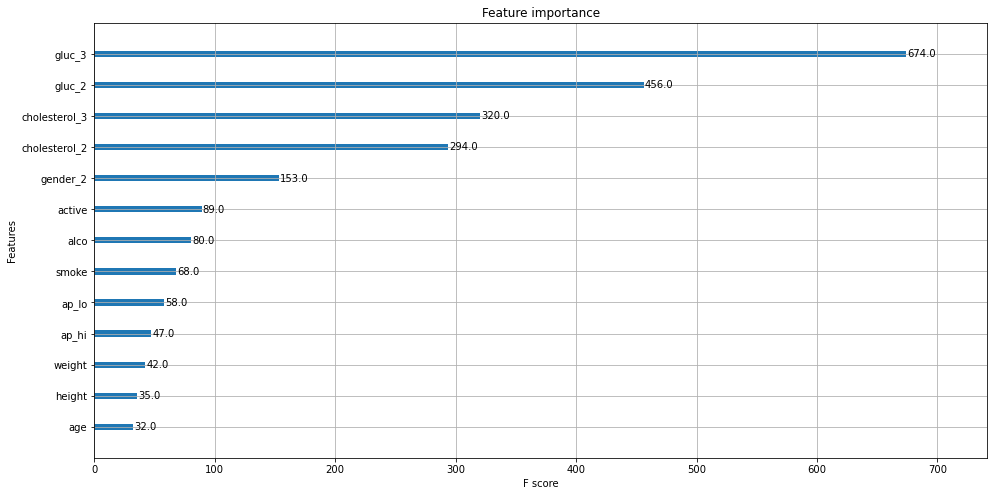

In [41]:
model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma,
                          reg_alpha = clf.best_estimator_.reg_alpha)

model.fit(X_train_values,y_train_values)

xgb.plot_importance(model).set_yticklabels(X_df_train.drop(["cardio"],axis =1).columns) 
        
fig = plt.gcf()

fig.set_size_inches(16,8)


In [ ]:
# WHAT IF WE  JUST USE FEATURES HAVING FEATURE IMPORTANCE MORE THAN 50 ?

In [61]:
np.unique(np.sort(model.feature_importances_))[::-1] 

array([0.6130093 , 0.159708  , 0.05187093, 0.02984262, 0.0297177 ,
       0.0283867 , 0.02680661, 0.0233645 , 0.01920056, 0.0180931 ],
      dtype=float32)

In [52]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.unique(np.sort(model.feature_importances_))[::-1] 
selected_threshold = 0
max_accuracy = 0

for threshold in thresholds:
    
    selection = SelectFromModel(model,threshold = threshold,prefit = True) # prefit is to check whether you trained the model before or not. 
    select_X_train = selection.transform(X_train_values) # eliminating the features below some thresholds.

    selection_model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma,
                          reg_alpha = clf.best_estimator_.reg_alpha)

    selection_model.fit(select_X_train,y_train_values)

    select_X_val = selection.transform(X_val_values)

    pred = selection_model.predict(select_X_val)

    accuracy = met.accuracy_score(y_val_values,pred)

    print("Threshold :", threshold, "where accuracy : ", accuracy)

    if (accuracy > max_accuracy) :
       max_accuracy = accuracy
       selected_threshold = threshold

    print("Highest accuracy with threshold" , threshold)
    


selection = SelectFromModel(model,threshold = selected_threshold,prefit = True)
select_X_train = selection.transform(X_train_values)

selection_model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma,
                          reg_alpha = clf.best_estimator_.reg_alpha)

selection_model.fit(select_X_train,y_train_values)

select_X_test = selection.transform(X_test_values)

pred = selection_model.predict(select_X_test)

accuracy = met.accuracy_score(y_test_values,pred)

Threshold : 0.56228477 where accuracy :  0.7144642857142857
Highest accuracy with threshold 0.56228477
Threshold : 0.16180387 where accuracy :  0.7277678571428572
Highest accuracy with threshold 0.16180387
Threshold : 0.05228109 where accuracy :  0.7300892857142857
Highest accuracy with threshold 0.05228109
Threshold : 0.03440073 where accuracy :  0.7325892857142857
Highest accuracy with threshold 0.03440073
Threshold : 0.031004438 where accuracy :  0.7325892857142857
Highest accuracy with threshold 0.031004438
Threshold : 0.030858727 where accuracy :  0.735
Highest accuracy with threshold 0.030858727
Threshold : 0.026572032 where accuracy :  0.7376785714285714
Highest accuracy with threshold 0.026572032
Threshold : 0.023211263 where accuracy :  0.7370535714285714
Highest accuracy with threshold 0.023211263
Threshold : 0.018645369 where accuracy :  0.7361607142857143
Highest accuracy with threshold 0.018645369
Threshold : 0.018046258 where accuracy :  0.7391071428571429
Highest accurac

In [54]:
select_X_val = selection.transform(X_val_values)
   
eval_set = [(select_X_train,y_train_values),(select_X_val,y_val_values)]

selection_model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma,
                          reg_alpha = clf.best_estimator_.reg_alpha)

model.fit(select_X_train,y_train_values,eval_set = eval_set, eval_metric = ["error","logloss"],verbose = True) 



[0]	validation_0-error:0.26679	validation_0-logloss:0.66739	validation_1-error:0.26902	validation_1-logloss:0.66750
[1]	validation_0-error:0.26667	validation_0-logloss:0.64643	validation_1-error:0.26893	validation_1-logloss:0.64669
[2]	validation_0-error:0.26683	validation_0-logloss:0.62919	validation_1-error:0.26848	validation_1-logloss:0.62953
[3]	validation_0-error:0.26578	validation_0-logloss:0.61494	validation_1-error:0.26839	validation_1-logloss:0.61538
[4]	validation_0-error:0.26576	validation_0-logloss:0.60306	validation_1-error:0.26768	validation_1-logloss:0.60371
[5]	validation_0-error:0.26531	validation_0-logloss:0.59314	validation_1-error:0.26857	validation_1-logloss:0.59393
[6]	validation_0-error:0.26482	validation_0-logloss:0.58480	validation_1-error:0.26777	validation_1-logloss:0.58560
[7]	validation_0-error:0.26469	validation_0-logloss:0.57775	validation_1-error:0.26848	validation_1-logloss:0.57860


/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-error:0.26473	validation_0-logloss:0.57181	validation_1-error:0.26830	validation_1-logloss:0.57285
[9]	validation_0-error:0.26484	validation_0-logloss:0.56677	validation_1-error:0.26813	validation_1-logloss:0.56793
[10]	validation_0-error:0.26513	validation_0-logloss:0.56248	validation_1-error:0.26732	validation_1-logloss:0.56367
[11]	validation_0-error:0.26464	validation_0-logloss:0.55896	validation_1-error:0.26741	validation_1-logloss:0.56026
[12]	validation_0-error:0.26402	validation_0-logloss:0.55583	validation_1-error:0.26705	validation_1-logloss:0.55737
[13]	validation_0-error:0.26435	validation_0-logloss:0.55324	validation_1-error:0.26768	validation_1-logloss:0.55476
[14]	validation_0-error:0.26375	validation_0-logloss:0.55096	validation_1-error:0.26643	validation_1-logloss:0.55255
[15]	validation_0-error:0.26315	validation_0-logloss:0.54898	validation_1-error:0.26536	validation_1-logloss:0.55076
[16]	validation_0-error:0.26301	validation_0-logloss:0.54721	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, ...)

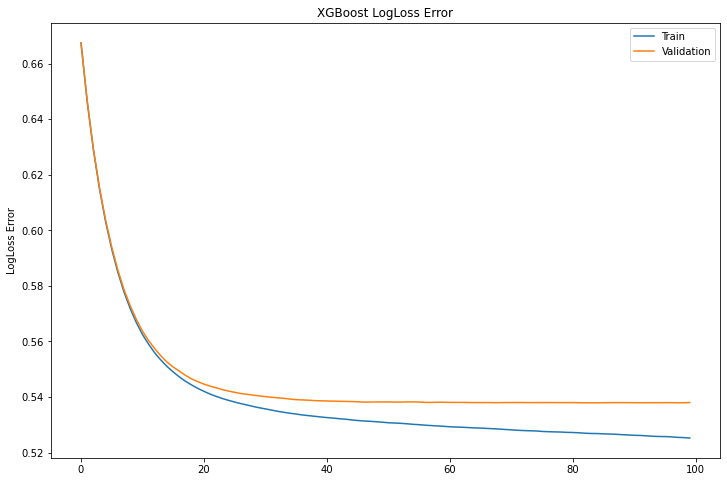

In [56]:
results = model.evals_result()

epochs = len(results["validation_0"]["error"])

x_axis = range(0,epochs)

fig,ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(x_axis,results["validation_0"]["logloss"],label = "Train") 
ax.plot(x_axis,results["validation_1"]["logloss"],label = "Validation")
plt.ylabel("LogLoss Error") 
plt.title("XGBoost LogLoss Error")
plt.legend()
plt.show()

In [58]:
pred = model.predict(select_X_test)

print(met.accuracy_score(y_test_values,pred))

0.7358571428571429


In [60]:
model = xgb.XGBClassifier(learning_rate = clf.best_estimator_.learning_rate, 
                          n_estimators = clf.best_estimator_.n_estimators,
                          max_depth = clf.best_estimator_.max_depth,
                          min_child_weight = clf.best_estimator_.min_child_weight,
                          gamma = clf.best_estimator_.gamma,
                          reg_alpha = clf.best_estimator_.reg_alpha) 

# early rounds = 10. If logloss does not decrease during 10 epochs then terminate training.

model.fit(select_X_train,y_train_values,eval_metric = ["error","logloss"],eval_set = eval_set, verbose = True, early_stopping_rounds = 10)

pred = model.predict(select_X_test)

print(met.accuracy_score(y_test_values,pred))

[0]	validation_0-error:0.26679	validation_0-logloss:0.66739	validation_1-error:0.26902	validation_1-logloss:0.66750
[1]	validation_0-error:0.26667	validation_0-logloss:0.64643	validation_1-error:0.26893	validation_1-logloss:0.64669
[2]	validation_0-error:0.26683	validation_0-logloss:0.62919	validation_1-error:0.26848	validation_1-logloss:0.62953
[3]	validation_0-error:0.26578	validation_0-logloss:0.61494	validation_1-error:0.26839	validation_1-logloss:0.61538
[4]	validation_0-error:0.26576	validation_0-logloss:0.60306	validation_1-error:0.26768	validation_1-logloss:0.60371
[5]	validation_0-error:0.26531	validation_0-logloss:0.59314	validation_1-error:0.26857	validation_1-logloss:0.59393
[6]	validation_0-error:0.26482	validation_0-logloss:0.58480	validation_1-error:0.26777	validation_1-logloss:0.58560
[7]	validation_0-error:0.26469	validation_0-logloss:0.57775	validation_1-error:0.26848	validation_1-logloss:0.57860
[8]	validation_0-error:0.26473	validation_0-logloss:0.57181	validation_1